Steps for Building a Machine Learning Model : 

  1. Understand the Project:
    Gain a clear understanding of the project's objectives, requirements, and the problem it aims to solve.

  2. Import Libraries:
    Begin by importing the essential libraries and tools required for data manipulation, analysis, and modeling.

  3. Load the Data:
    Import the dataset or retrieve it from the appropriate source to start the analysis.

  4. Data Cleaning and Understanding:
    Handle missing values, remove duplicates, and ensure the data is in a usable format. Gain a preliminary understanding of the data structure and types.

  5. Perform Exploratory Data Analysis (EDA):
    Univariate Analysis: Examine the distribution of individual variables to identify patterns, trends, and potential outliers.
    Bivariate Analysis: Explore the relationship between the target variable (e.g., selling price) and other features to uncover dependencies.
    Multivariate Analysis: Assess correlations and interactions among multiple features to understand complex relationships and feature significance.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error, mean_squared_error


In [55]:
data = pd.read_csv("Cardekho.csv")
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [57]:
#summary statistics
data.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [58]:
#Basic data checking
data.shape

(15411, 13)

In [59]:
data['brand'].value_counts(normalize = True)*100

brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini              0.110311
Nissan            0.071378
Lexus             0.064889
Isuzu             0.051911
Bentley           0.019467
Maserati          0.012978
ISUZU             0.012978
Ferrari           0.006489
Mercedes-AMG      0.006489
Rolls-Royce       0.006489
Force             0.006489
Name: proportion, dtype: float64

EDA : Exploratory data analysis

we explore the data, understand trends, how are numbers

<Axes: xlabel='mileage', ylabel='Density'>

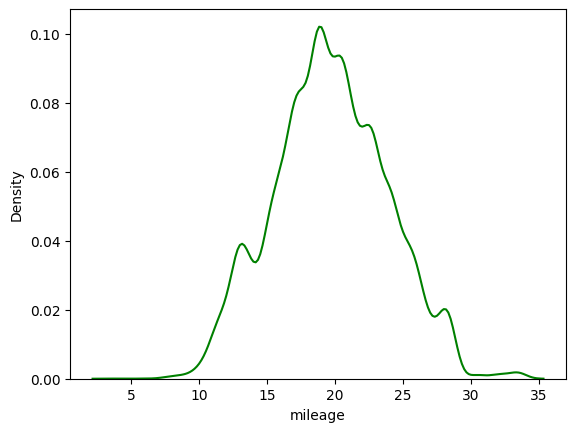

In [60]:
sns.kdeplot(x=data['mileage'], color='g')

<Axes: xlabel='seats', ylabel='Density'>

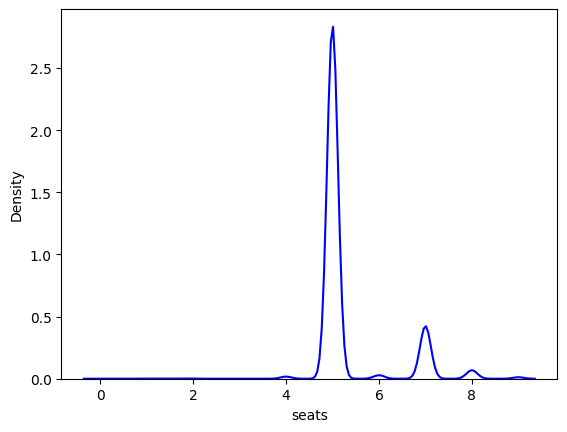

In [61]:
sns.kdeplot(x = data['seats'], color='b')

<Axes: xlabel='engine', ylabel='Density'>

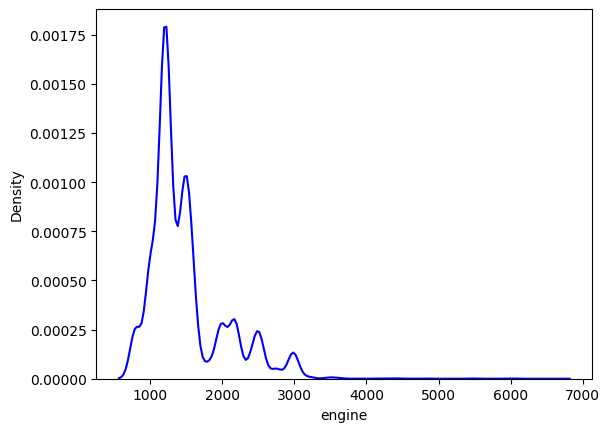

In [62]:
sns.kdeplot(x=data['engine'], color = 'b')

<Axes: xlabel='km_driven', ylabel='Density'>

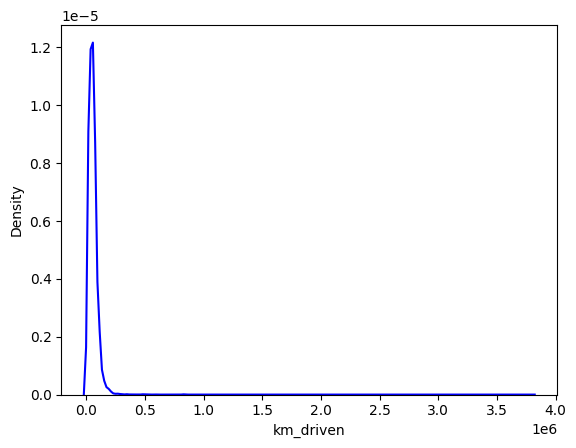

In [63]:
sns.kdeplot(x=data['km_driven'], color = 'b')

<Axes: xlabel='seller_type', ylabel='count'>

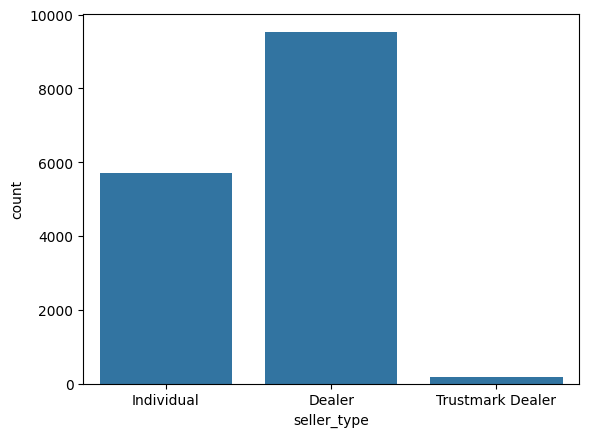

In [64]:
sns.countplot(x = data['seller_type'])

<Axes: xlabel='fuel_type', ylabel='count'>

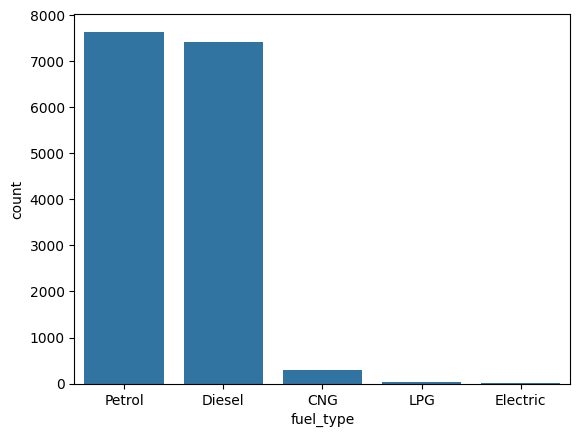

In [65]:
sns.countplot(x = data['fuel_type'])

In [66]:
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


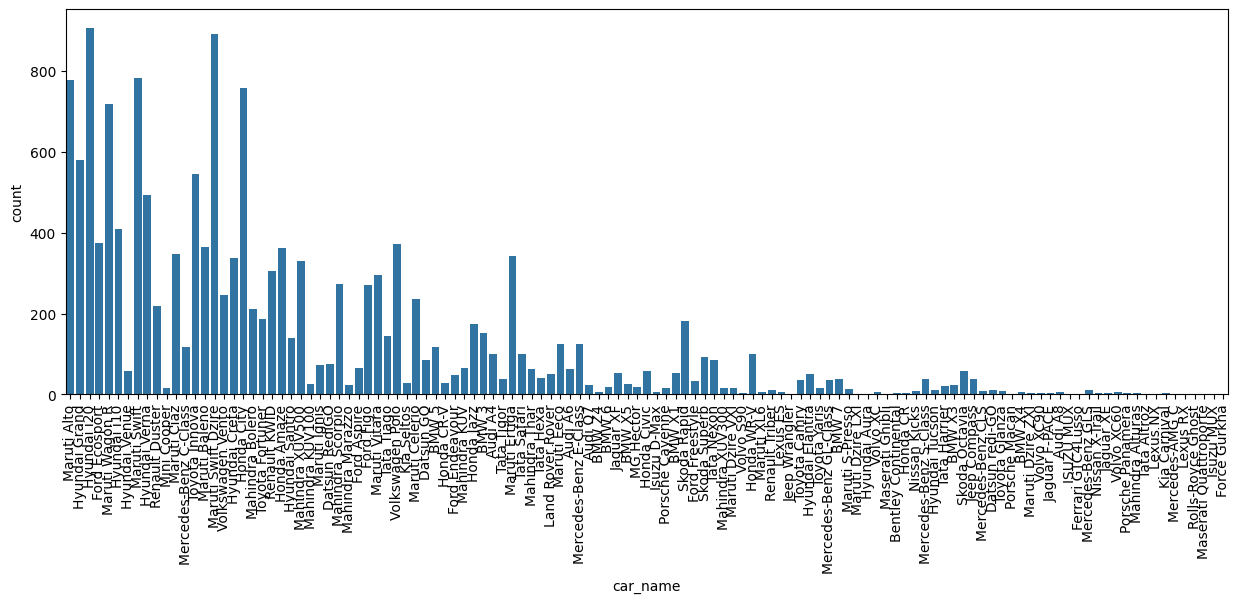

In [67]:
plt.figure(figsize = (15,5))
sns.countplot(x=data['car_name'])
plt.xticks(rotation=90)
plt.show()

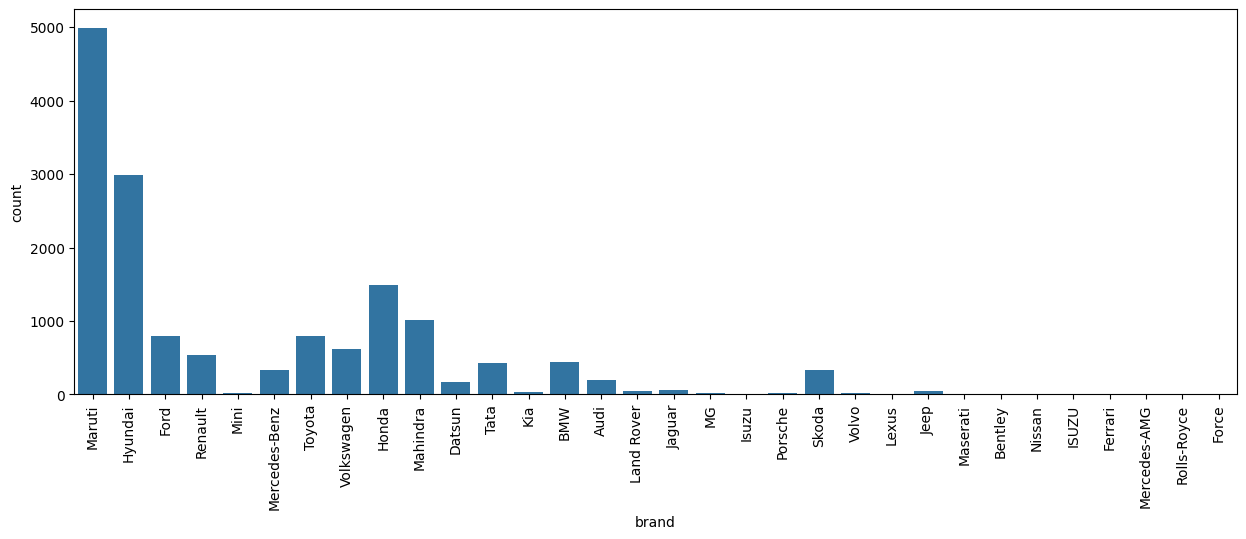

In [12]:
plt.figure(figsize = (15,5))
sns.countplot(x=data['brand'])
plt.xticks(rotation=90)
plt.show()

Bivariate analysis
Bi-variate analysis - When we look at the relationship between each column and the selling price(Dependent Variable)

<Axes: xlabel='selling_price', ylabel='max_power'>

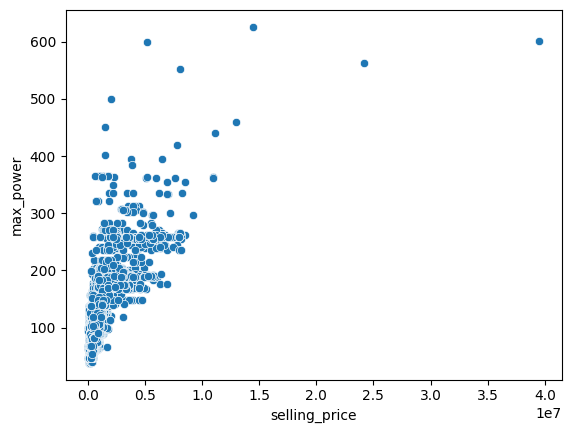

In [68]:

sns.scatterplot(data=data, x='selling_price', y='max_power')

<Axes: xlabel='selling_price', ylabel='engine'>

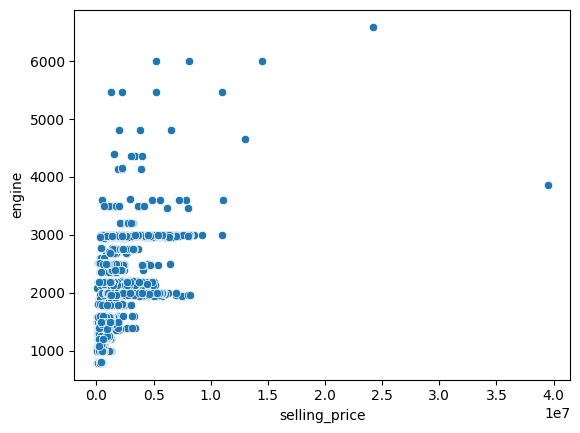

In [69]:
sns.scatterplot(data=data, x='selling_price', y='engine')

<Axes: xlabel='selling_price', ylabel='vehicle_age'>

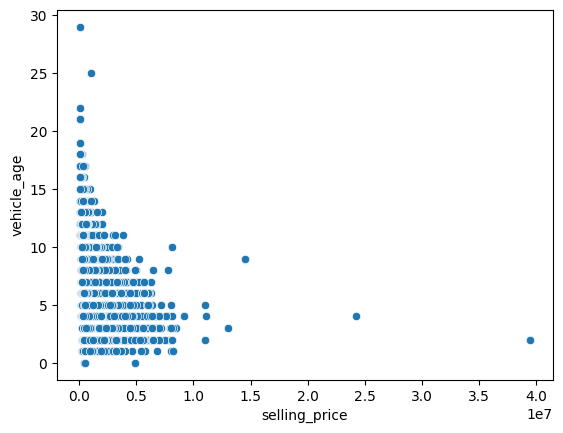

In [70]:
sns.scatterplot(data=data, x='selling_price', y='vehicle_age')

<Axes: xlabel='selling_price', ylabel='km_driven'>

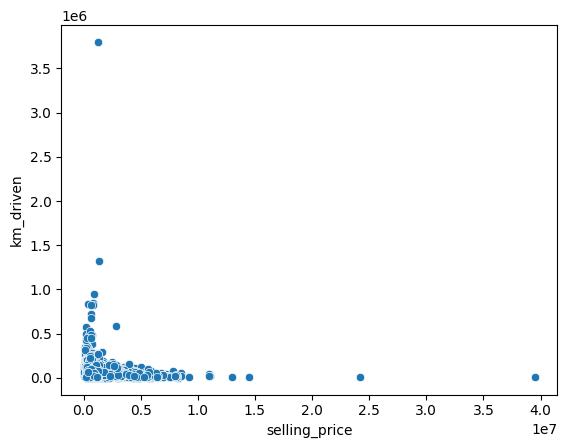

In [71]:
sns.scatterplot(data=data, x='selling_price', y='km_driven')

<Axes: xlabel='selling_price', ylabel='mileage'>

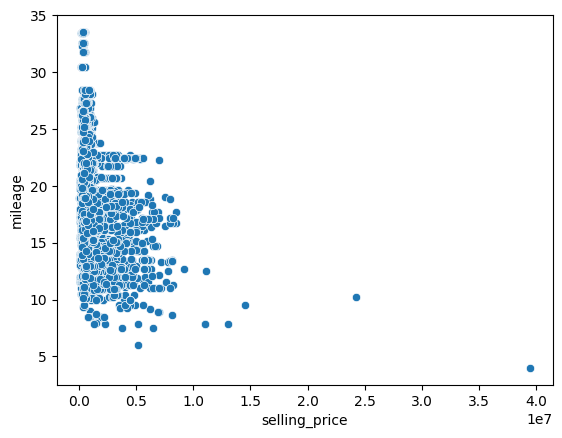

In [72]:
sns.scatterplot(data=data, x='selling_price', y='mileage')

<Axes: xlabel='selling_price', ylabel='seats'>

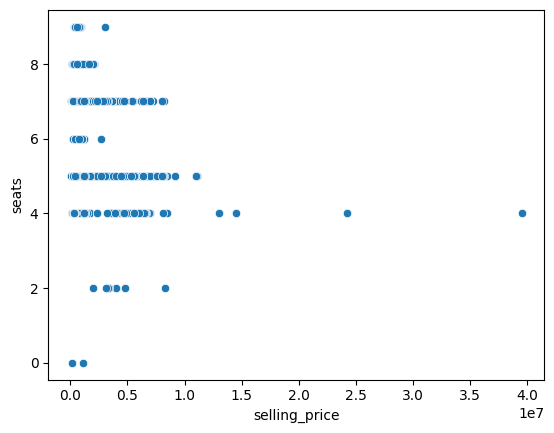

In [73]:
sns.scatterplot(data=data, x='selling_price', y='seats')

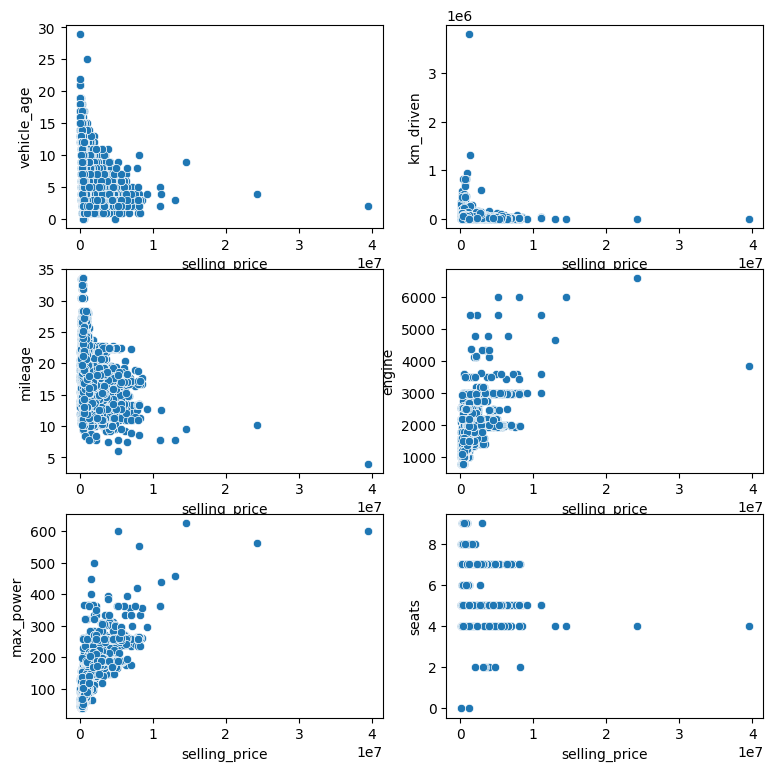

'\nVehicle age, Km_driven, mileage are impacting the selling_price negatively\n\nEngine, max_power will impact the selling_price positively\n'

In [53]:
plt.figure(figsize = (9,9))
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

for col in range(len(numerical_cols)) :
    plt.subplot(3,2,col+1)
    sns.scatterplot(data=data, x='selling_price', y=numerical_cols[col])
plt.show()

'''
Vehicle age, Km_driven, mileage, engine are impacting the selling_price negatively

Engine, max_power will impact the selling_price positively
'''

Multi-variate analysis - to check correlation between all the combination of numerical features

<Axes: >

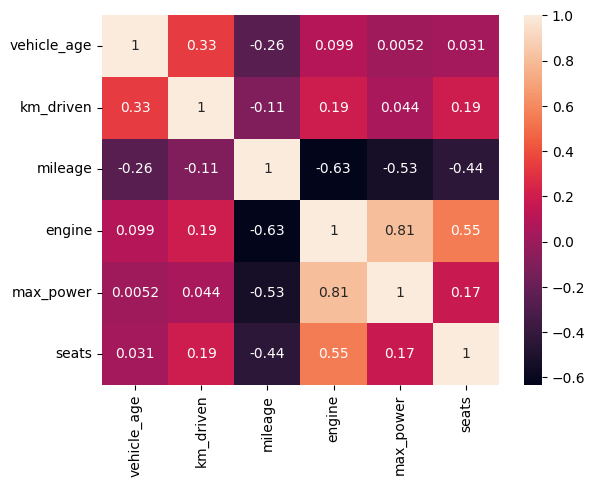

In [74]:
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

sns.heatmap(data= data[numerical_cols].corr(), annot= True)

In [75]:
features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
data[features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


In [76]:
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [77]:
model_data = data.copy()
model_data.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [78]:
model_data.drop(labels = ['car_name','brand','model','seller_type'], axis = 1, inplace = True)
model_data

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...
15406,9,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000


In [79]:
model_data = pd.get_dummies(model_data, dtype=float)
model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [80]:
"""Dropping Selling price from data
as it is dependent variable
X- Dependent variable
Y- Independent Variable
"""


X = model_data.drop('selling_price', axis = 1)


Y = model_data['selling_price']
Y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [81]:
"""
Dividing data into Train and Test data.
"""
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.2)

# 80% of data goes to training data and 20% goes to testing data.


In [82]:
#Applying Linear Regression on model
Regressor = LinearRegression().fit(train_X,train_Y)


In [83]:
#getting the predictions
prediction = Regressor.predict(test_X)

print(prediction)
print(test_Y)

[1257198.93157195  595251.60930166  -13197.81666938 ... 2286772.55886442
 1925837.36483864  167393.16059988]
2558      775000
317       455000
6739      290000
13308     440000
7487     1400000
          ...   
5337      275000
5118      550000
13545    2775000
9346      890000
7740      240000
Name: selling_price, Length: 3083, dtype: int64


In [47]:
test_X["predicted_sales_price"] = prediction

test_X["Actual_price"] = test_Y

test_X["Difference"] = test_X["predicted_sales_price"] - test_X["Actual_price"]

test_X

mse = []
mse.append(mean_squared_error(y_true = test_Y, y_pred = prediction))

rmse = []
rmse.append(np.sqrt(mse))

rmse



[array([421754.94069426])]